# **Data Wrangling, Exploratory Data Analysis, and Vizualization**

# **A. Data Wrangling**

In [ ]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring Warning during trainings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Initialize an empty list for the list of chunks created from the dataset.
all_chunks = []

#import the dataset and break it into chunks of 500,000
data = pd.read_csv('/content/NUTRITION2001_2022.zip', chunksize=500000)

for chunk in data:
    # Extract the needed columns
    cols_to_extract = ['REF_AREA:Geographic area', 'TIME_PERIOD:Time period', 'INDICATOR:Indicator',
                    'RESIDENCE:Residence', 'WEALTH_QUINTILE:Wealth Quintile', 'MATERNAL_EDU_LVL:Mother\'s Education Level', 'OBS_VALUE:Observation Value']
    chunk = chunk[cols_to_extract]

    # Rename columns
    chunk = chunk.rename(columns={'REF_AREA:Geographic area':'Country'
                                ,'TIME_PERIOD:Time period':'Year'
                                ,'INDICATOR:Indicator':'Indicator'
                                ,'RESIDENCE:Residence':'Residence'
                                ,'WEALTH_QUINTILE:Wealth Quintile':'Poverty_Rating'
                                ,'MATERNAL_EDU_LVL:Mother\'s Education Level':'Maternal_Education'
                                ,'OBS_VALUE:Observation Value':'Observation_Value'})

    # Clean up values - remove colons and values before it
    chunk['Country'] = chunk['Country'].apply(lambda x:x[x.index(':')+1:])
    chunk['Indicator'] = chunk['Indicator'].apply(lambda x:x[x.index(':')+1:])
    chunk['Residence'] = chunk['Residence'].apply(lambda x:x[x.index(':')+1:])
    chunk['Poverty_Rating'] = chunk['Poverty_Rating'].apply(lambda x:x[x.index(':')+1:])
    chunk['Maternal_Education'] = chunk['Maternal_Education'].apply(lambda x:x[x.index(':')+1:])

    chunk = chunk[~chunk['Year'].str.contains('-', na=False)]

    all_chunks.append(chunk)

df = pd.concat(all_chunks)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177962 entries, 0 to 2398605
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Country             object 
 1   Year                object 
 2   Indicator           object 
 3   Residence           object 
 4   Poverty_Rating      object 
 5   Maternal_Education  object 
 6   Observation_Value   float64
dtypes: float64(1), object(6)
memory usage: 132.9+ MB


## **Observations.**

*   `Country` column is of Object(String) Datatype.
*   `Year` column is of Object(String) Datatype. We will convert it to Date format DD-MM-YYYY later.
*   `Indicator` column is of Object(String) Datatype.
*   `Residence` column is of Object(String) Datatype.
*   `Maternal_Education` column is of Object(String) Datatype.
*   `Poverty_Rating` column is of Object(String) Datatype.
*   `Observation_value` column is of Float(Number) Datatype.















In [ ]:
# Unique categories in the 'indicator' column
uniq_ind = df['Indicator'].unique()
uniq_ind

array([' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Ever breastfed (0-23 months)',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Mixed Milk Feeding (0-5 months)',
       ' Predominantly breastfeeding (children aged 0 to 5 months)',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)',
       ' Food group- Eggs (6-23months)',
       ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)',
       ' Food group- Grains, roots, tubers and plantains (6-23months)',
       ' Introduction to solid, semi-solid foods (6-8 months)',
       ' Food group- Pulses (beans, peas, lentils), nuts and seeds (6-23months)',
       ' Minimum acceptable diet (children aged 6-

In [ ]:
df['Country'] = df['Country'].str.strip()
df['Indicator'] = df['Indicator'].str.strip()

In [ ]:
# Indicators of interest
indicators_intrst = ['Ever breastfed (0-23 months)', 'Height-for-age <-2 SD (stunting)'
                     , 'Introduction to solid, semi-solid foods (6-8 months)', 'Mean BMI-for-age'
                     , 'Minimum meal frequency (children aged 6 to 23 months)'
                     , 'Weight-for-age <-2 SD (Underweight)', 'Weight-for-height <-2 SD (wasting)'
                     , 'Weight-for-height <-3 SD (severe wasting)', 'Weight-for-height >+2 SD (overweight)']

In [ ]:
mask = df['Indicator'].isin(indicators_intrst)
ind_df = df[mask]

In [ ]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
			'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Ivory Coast', 'Djibouti',
			'Democratic Republic of the Congo', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
			'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
			'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
			'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda',
			'Sao Tome & Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
			'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

In [ ]:
mask = ind_df['Country'].isin(african_countries)
nutri_africa = ind_df[mask]

In [ ]:
West_Africa = ['Benin', 'Burkina Faso', 'Ivory Coast','Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
              'Liberia', 'Mali', 'Mauritania',  'Niger', 'Nigeria','Senegal','Sierra Leone',
              'Togo']


South_africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia','South Africa', 'Zambia','Zimbabwe' ]

East_Africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya','Madagascar',
              'Malawi', 'Mauritius','Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
              'Sudan', 'Tanzania','Uganda']

North_Africa = ['Algeria','Egypt','Libya', 'Morocco', 'Tunisia']

Central_Africa = ['Angola','Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo',
                 'Equatorial Guinea','Gabon', 'Republic of the Congo', 'Sao Tome & Principe']

In [ ]:
# Group countries into regions
def map_to_region(country):
    if country in West_Africa:
        return 'West Africa'
    elif country in South_africa:
        return 'South Africa'
    elif country in East_Africa:
        return 'East Africa'
    elif country in North_Africa:
        return 'North Africa'
    else:
        return 'Central Africa'

nutri_africa['Region'] = nutri_africa['Country'].apply(map_to_region)

In [ ]:
nutri_africa.shape

(104480, 8)

In [ ]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015,Ever breastfed (0-23 months),Total,Total,Total,95.8,Central Africa
681,Angola,2015,Ever breastfed (0-23 months),Total,Total,Total,94.1,Central Africa
682,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 20%,Total,94.0,Central Africa
683,Angola,2015,Ever breastfed (0-23 months),Urban,Bottom 20%,Total,90.2,Central Africa
684,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 40%,Total,93.4,Central Africa


In [ ]:
# Unique residences
nutri_africa['Residence'].unique()

array([' Total', ' Rural', ' Urban'], dtype=object)

In [ ]:
nutri_africa['Residence'] = nutri_africa['Residence'].str.strip().replace('Total', 'Suburban')
nutri_africa['Residence'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [ ]:
nutri_africa['Maternal_Education'].value_counts()

 Total                                                        98539
 None and Primary                                              1102
 Secondary and Higher                                          1098
 Primary education                                             1097
 Never attended an education programme / No schooling          1054
 Secondary education (lower and upper secondary education)      912
 Tertiary education                                             678
Name: Maternal_Education, dtype: int64

In [ ]:
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('None and Primary', 'Primary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary and Higher','Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary education (lower and upper secondary education)', 'Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Never attended an education programme / No schooling','No education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Total','Primary education')

In [ ]:
nutri_africa['Maternal_Education'].value_counts()

Primary education      100738
Secondary education      2010
No education             1054
Tertiary education        678
Name: Maternal_Education, dtype: int64

In [ ]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015,Ever breastfed (0-23 months),Suburban,Total,Primary education,95.8,Central Africa
681,Angola,2015,Ever breastfed (0-23 months),Suburban,Total,Primary education,94.1,Central Africa
682,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 20%,Primary education,94.0,Central Africa
683,Angola,2015,Ever breastfed (0-23 months),Urban,Bottom 20%,Primary education,90.2,Central Africa
684,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 40%,Primary education,93.4,Central Africa


In [ ]:
nutri_africa['Poverty_Rating'].value_counts()

 Total          76845
 Fourth          2906
 Middle          2856
 Highest         2785
 Second          2763
 Lowest          2655
 Bottom 80%      1770
 Richest 40%     1770
 Richest 60%     1770
 Richest 80%     1770
 Bottom 60%      1751
 Bottom 40%      1666
 Richest 20%     1658
 Bottom 20%      1515
Name: Poverty_Rating, dtype: int64

In [ ]:
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Total','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Lowest','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Second','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Middle','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Fourth','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Highest','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 20%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 40%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 60%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 80%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 20%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 40%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 60%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 80%','Rich')

In [ ]:
nutri_africa['Poverty_Rating'].value_counts()

Middle class    86128
Rich             9753
Poor             8599
Name: Poverty_Rating, dtype: int64

In [ ]:
nutri_africa.head()
nutri_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104480 entries, 680 to 2393090
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             104480 non-null  object 
 1   Year                104480 non-null  object 
 2   Indicator           104480 non-null  object 
 3   Residence           104480 non-null  object 
 4   Poverty_Rating      104480 non-null  object 
 5   Maternal_Education  104480 non-null  object 
 6   Observation_Value   104480 non-null  float64
 7   Region              104480 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.2+ MB


# **Exploratory Data Analysis and Visualization**

In [ ]:
# Country again indicators
nutri_africa['Indicator'].value_counts()

Height-for-age <-2 SD (stunting)                         16391
Weight-for-height >+2 SD (overweight)                    16107
Mean BMI-for-age                                         15997
Weight-for-age <-2 SD (Underweight)                      15278
Weight-for-height <-2 SD (wasting)                       15249
Weight-for-height <-3 SD (severe wasting)                15248
Ever breastfed (0-23 months)                              5435
Minimum meal frequency (children aged 6 to 23 months)     2765
Introduction to solid, semi-solid foods (6-8 months)      2010
Name: Indicator, dtype: int64

In [ ]:
country_ind = nutri_africa.pivot_table(index='Country', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)
country_ind.head()

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Country,,,,,,,,,
Algeria,88.318293,14.118919,82.196875,0.589790,43.395000,4.330631,4.573874,2.034234,13.126426
Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
Benin,96.206897,34.351368,63.885075,-0.127660,47.447863,17.808303,5.991336,1.632852,2.059878
Botswana,80.500000,28.437778,72.366667,0.212222,0.000000,11.336667,7.533333,3.175556,10.147778
Burkina Faso,98.679825,27.525185,49.420408,-0.470621,48.243478,20.032460,8.697581,1.642339,1.071014


In [ ]:
country_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
country_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
country_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
country_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
country_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
country_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [ ]:
country_ind.reset_index(inplace=True)

In [ ]:
country_ind.head()

Indicator,Country,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Algeria,88.318293,14.118919,82.196875,0.589790,43.395000,4.330631,4.573874,2.034234,13.126426
1,Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
2,Benin,96.206897,34.351368,63.885075,-0.127660,47.447863,17.808303,5.991336,1.632852,2.059878
3,Botswana,80.500000,28.437778,72.366667,0.212222,0.000000,11.336667,7.533333,3.175556,10.147778
4,Burkina Faso,98.679825,27.525185,49.420408,-0.470621,48.243478,20.032460,8.697581,1.642339,1.071014


In [ ]:
region_ind = nutri_africa.pivot_table(index='Region', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [ ]:
region_ind.head()

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Region,,,,,,,,,
Central Africa,96.195548,36.573605,76.627542,-0.011153,33.741077,20.638362,8.428013,2.830829,5.399948
East Africa,97.205057,39.766547,73.719829,0.008423,43.758834,20.922700,7.700318,2.420064,4.678874
North Africa,93.314540,17.510387,80.341463,0.574958,52.102667,4.997932,5.211828,2.397932,13.964798
South Africa,94.302500,31.782170,87.070787,0.367355,53.870681,11.502622,4.261353,1.485684,7.744215
West Africa,97.142594,30.085423,59.689071,-0.331215,39.440949,19.669736,8.697291,2.132490,2.257215


In [ ]:
region_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
region_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
region_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
region_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
region_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
region_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [ ]:
region_ind.head()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Region,,,,,,,,,
Central Africa,96.195548,36.573605,76.627542,-0.011153,33.741077,20.638362,8.428013,2.830829,5.399948
East Africa,97.205057,39.766547,73.719829,0.008423,43.758834,20.922700,7.700318,2.420064,4.678874
North Africa,93.314540,17.510387,80.341463,0.574958,52.102667,4.997932,5.211828,2.397932,13.964798
South Africa,94.302500,31.782170,87.070787,0.367355,53.870681,11.502622,4.261353,1.485684,7.744215
West Africa,97.142594,30.085423,59.689071,-0.331215,39.440949,19.669736,8.697291,2.132490,2.257215


<Axes: xlabel='Region'>

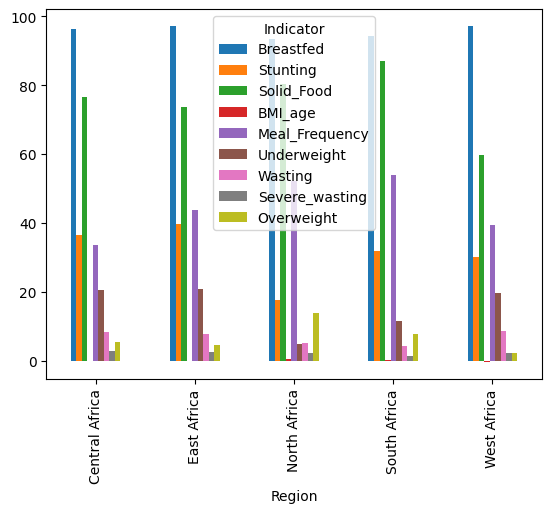

In [ ]:
region_ind.plot(kind='bar')

In [ ]:
education_ind = nutri_africa.pivot_table(index=['Maternal_Education'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [ ]:
education_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
education_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
education_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
education_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
education_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
education_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [ ]:
education_ind.head()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Maternal_Education,,,,,,,,,
No education,96.640000,38.658678,61.966102,-0.070940,36.845238,21.526271,8.758475,2.927119,4.657500
Primary education,96.467846,33.116521,69.213700,-0.042522,41.851343,18.098929,7.597524,2.242653,4.864670
Secondary education,96.255985,24.342358,76.744726,0.120179,47.055090,10.582063,5.863677,1.791480,6.405310
Tertiary education,94.807692,13.293023,86.960000,0.266667,60.587500,5.858824,4.714118,1.555294,9.217442


In [ ]:
#grouping maternal education and breastfeeding

meb = education_ind.groupby('Maternal_Education')['Breastfed'].mean().reset_index()
meb

,Maternal_Education,Breastfed
0,No education,96.640000
1,Primary education,96.467846
2,Secondary education,96.255985
3,Tertiary education,94.807692


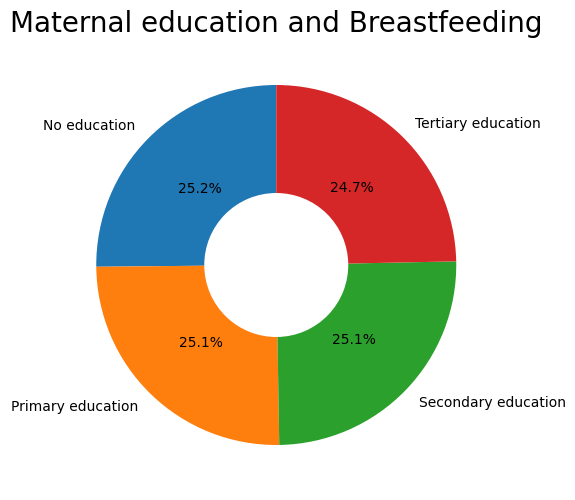

In [ ]:
# Create a donut chart
plt.pie(meb['Breastfed'], labels=meb['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches = 'tight', dpi = 300)

In [ ]:
#grouping maternal education and severe wasting

mebsw = education_ind.groupby('Maternal_Education')['Severe_wasting'].mean().reset_index()
mebsw

,Maternal_Education,Severe_wasting
0,No education,2.927119
1,Primary education,2.242653
2,Secondary education,1.791480
3,Tertiary education,1.555294


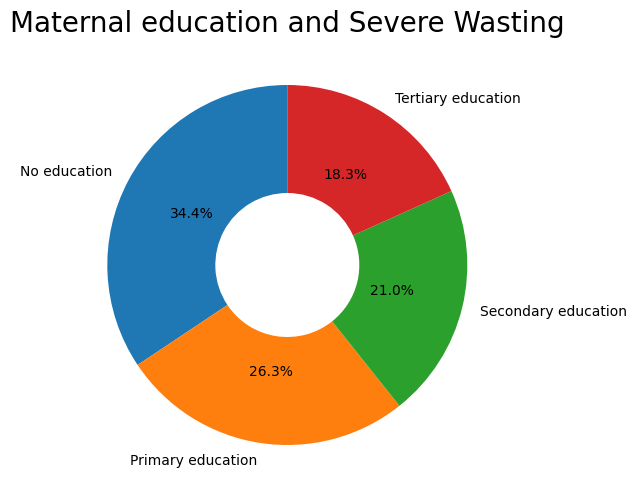

In [ ]:
# Create a donut chart
plt.pie(mebsw['Severe_wasting'], labels=mebsw['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Severe Wasting', fontsize=20)
plt.savefig('MateduSW', bbox_inches = 'tight', dpi = 300)

In [ ]:
#grouping maternal education and underweight

mebuw = education_ind.groupby('Maternal_Education')['Underweight'].mean().reset_index()
mebuw

,Maternal_Education,Underweight
0,No education,21.526271
1,Primary education,18.098929
2,Secondary education,10.582063
3,Tertiary education,5.858824


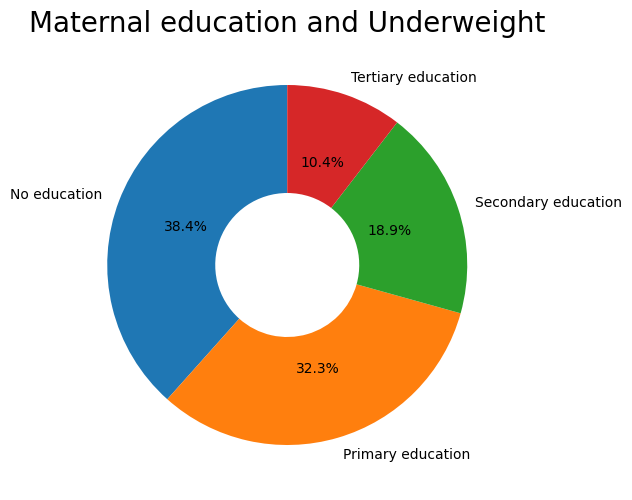

In [ ]:
# Create a donut chart
plt.pie(mebuw['Underweight'], labels=mebuw['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Underweight', fontsize=20)
plt.savefig('MateduUW', bbox_inches = 'tight', dpi = 300)

In [ ]:
poverty_ind = nutri_africa.pivot_table(index=['Poverty_Rating'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [ ]:
poverty_ind.head()

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Poverty_Rating,,,,,,,,,
Middle class,96.408919,33.132942,70.117665,-0.055730,42.445038,18.268814,7.651170,2.223638,4.734950
Poor,96.793155,39.155332,65.960967,-0.021288,38.783152,21.197813,8.376207,2.811062,5.230316
Rich,96.184449,25.562310,74.918852,0.113697,48.205435,12.066266,6.046812,1.880495,6.351795


In [ ]:
poverty_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
poverty_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
poverty_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
poverty_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
poverty_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

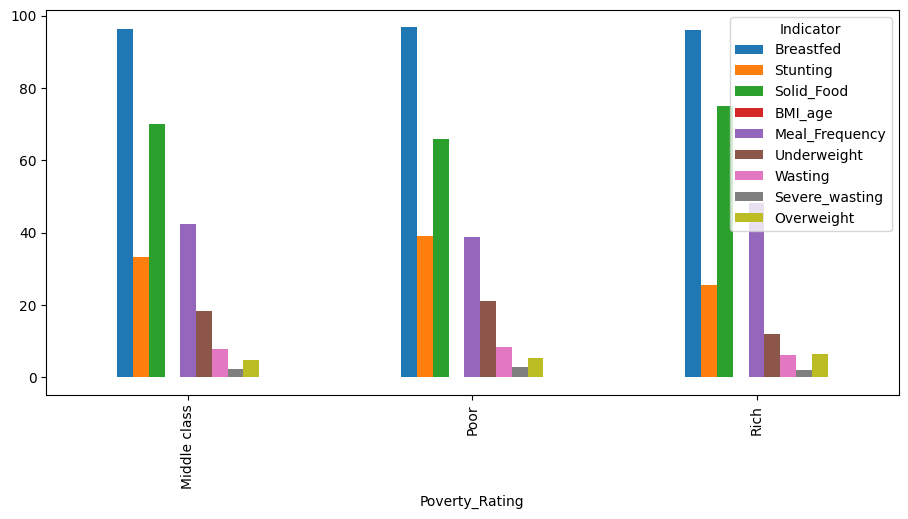

In [ ]:
poverty_ind.plot(kind='bar')
plt.gcf().set_size_inches(11, 5)

In [ ]:
# Top 10 countries in stunting
cst10 = country_ind.groupby('Country')['Stunting'].mean().nlargest(10).sort_values(ascending=True).reset_index()
cst10

,Country,Stunting
0,Ethiopia,40.153275
1,Central African Republic,41.018895
2,Zambia,42.415890
3,Democratic Republic of the Congo,43.152735
4,Mozambique,44.004219
5,Niger,44.866620
6,Malawi,45.172459
7,Madagascar,45.815132
8,Eritrea,46.678977
9,Burundi,54.313314


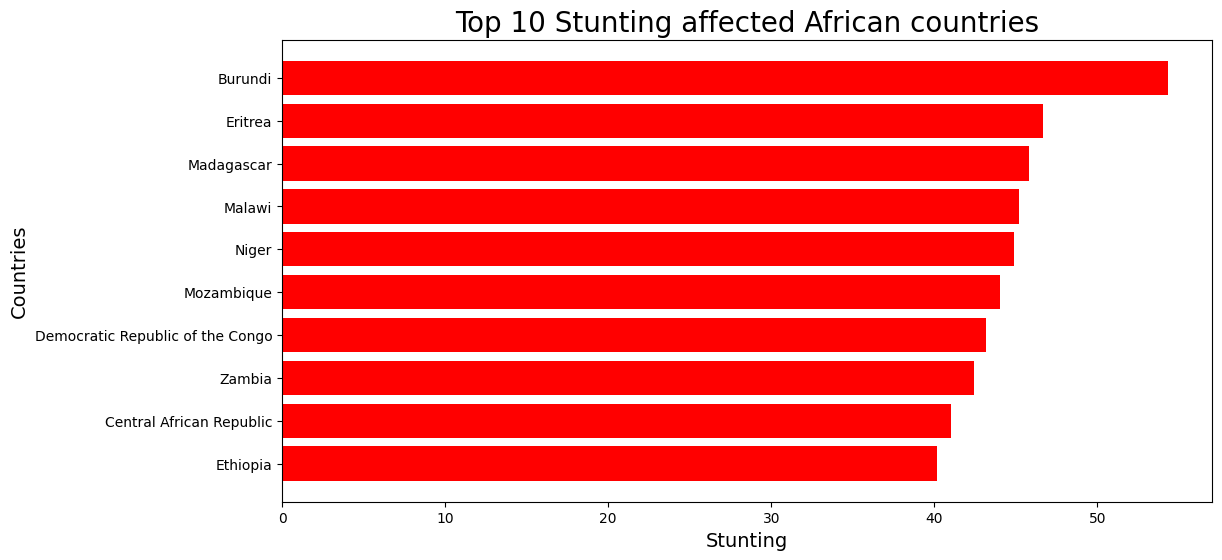

In [ ]:
plt.figure(figsize = [12,6])
plt.barh(cst10['Country'], cst10['Stunting'], color = 'r')
plt.title('Top 10 Stunting affected African countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('TopCountryStunting', bbox_inches = 'tight', dpi = 300)

In [ ]:
# Top 10 countries in stunting
clt10 = country_ind.groupby('Country')['Stunting'].mean().nsmallest(10).sort_values(ascending=False).reset_index()
clt10

,Country,Stunting
0,Egypt,24.294324
1,South Africa,24.234520
2,Gambia,22.814067
3,Senegal,18.594369
4,Morocco,17.330970
5,Gabon,16.862162
6,Algeria,14.118919
7,Tunisia,9.390338
8,Seychelles,7.576471
9,Cabo Verde,0.000000


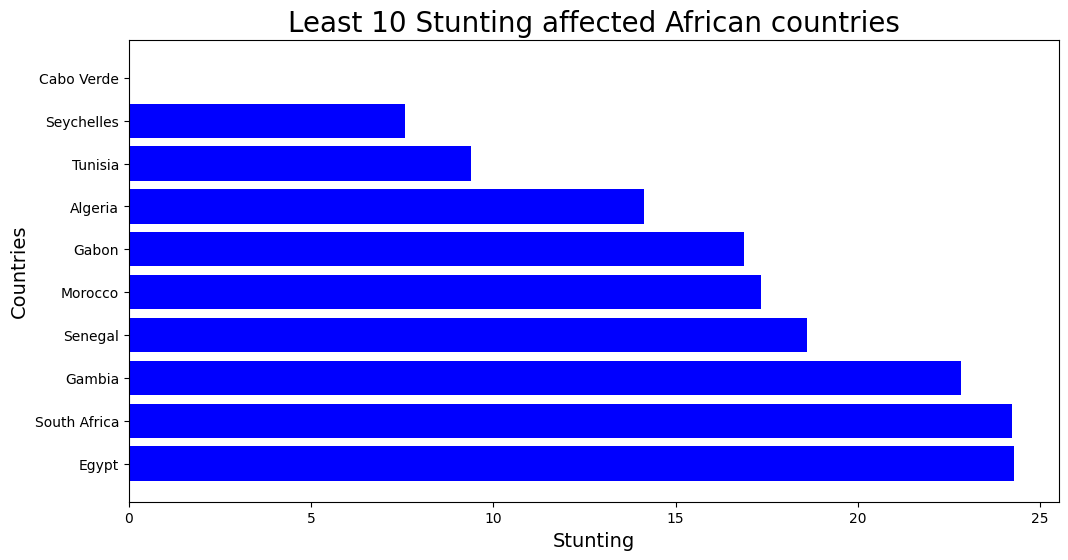

In [ ]:
plt.figure(figsize = [12,6])
plt.barh(clt10['Country'], clt10['Stunting'], color = 'b')
plt.title('Least 10 Stunting affected African countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryStunting', bbox_inches = 'tight', dpi = 300)

In [ ]:
region_years_ind = nutri_africa.pivot_table(index=['Region', 'Year'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [ ]:
region_years_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
region_years_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
region_years_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
region_years_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
region_years_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [ ]:
region_years_ind.reset_index()
region_years_ind

Indicator            Breastfed   Stunting  Solid_Food   BMI_age  \
Region         Year                                               
Central Africa 2001   0.000000  44.603297    0.000000 -0.243956   
               2004   0.000000  34.306452    0.000000  0.000000   
               2006   0.000000  37.305495    0.000000  0.000000   
               2007   0.000000  43.049495    0.000000 -0.003297   
               2010   0.000000  43.700000    0.000000 -0.063736   
...                        ...        ...         ...       ...   
West Africa    2018  96.800000  28.197603   58.448000 -0.410616   
               2019  97.391954  30.808400   67.135897 -0.270800   
               2020   0.000000  26.128667    0.000000 -0.380000   
               2021   0.000000  30.222424    0.000000 -0.360241   
               2022   0.000000  34.465789    0.000000 -0.557895   

Indicator            Meal_Frequency  Underweight    Wasting  Severe_wasting  \
Region         Year                                                           
Central Africa 2001        0.000000    29.786813  15.345055        5.762637   
               2004        0.000000    14.431183   6.183871        2.305376   
               2006        0.000000    16.029670   7.604396        2.567033   
               2007        0.000000    24.985870  10.769565        5.168478   
               2010        0.000000    24.227473   8.243956        2.805495   
...                             ...          ...        ...             ...   
West Africa    2018       37.878889    19.023636   8.790023        2.079365   
               2019       47.560215    18.873500   8.007480        1.447638   
               2020        0.000000    18.243750   6.948424        1.210888   
               2021        0.000000    20.456627   9.150909        1.975909   
               2022        0.000000    26.142105  10.511304        2.099130   

Indicator            Overweight  
Region         Year              
Central Africa 2001    6.720879  
               2004    8.806452  
               2006   10.487912  
               2007    7.506593  
               2010    4.860440  
...                         ...  
West Africa    2018    2.409070  
               2019    2.190461  
               2020    1.555471  
               2021    1.491701  
               2022    1.086842  

[152 rows x 9 columns]

In [ ]:
# stunting by region over years
sry = region_years_ind.groupby(['Region', 'Year'])['Stunting'].mean().reset_index()
sry

,Region,Year,Stunting
0,Central Africa,2001,44.603297
1,Central Africa,2004,34.306452
2,Central Africa,2006,37.305495
3,Central Africa,2007,43.049495
4,Central Africa,2010,43.700000
...,...,...,...
147,West Africa,2018,28.197603
148,West Africa,2019,30.808400
149,West Africa,2020,26.128667
150,West Africa,2021,30.222424


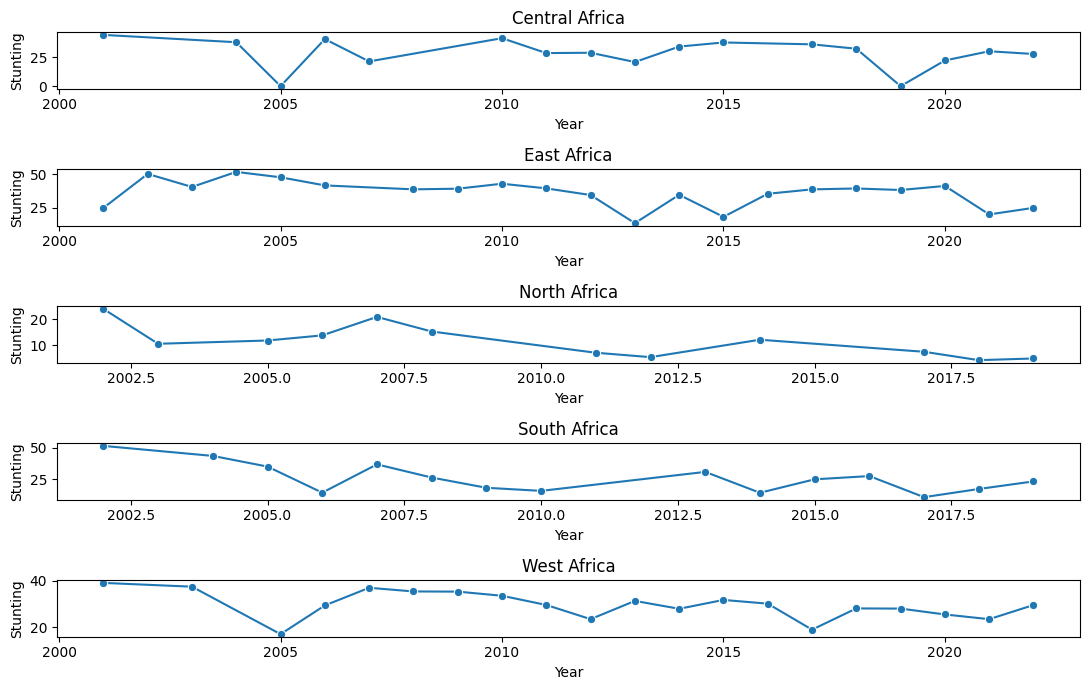

In [ ]:

plt.figure(figsize=(11, 7))

# Get unique regions
reg = sry['Region'].unique()

# Create subplots
for i, region in enumerate(reg, start=1):
    plt.subplot(len(reg), 1, i)

    # Filter the DataFrame for the current region
    data_for_region = sry[sry['Region'] == region]

    # Plot the line for the current region
    sns.lineplot(data=data_for_region, x='Year', y='Stunting', marker = 'o', ci=None)

    plt.title(region)  # Set the title as the region name

# Adjust layout
plt.tight_layout()

plt.show()


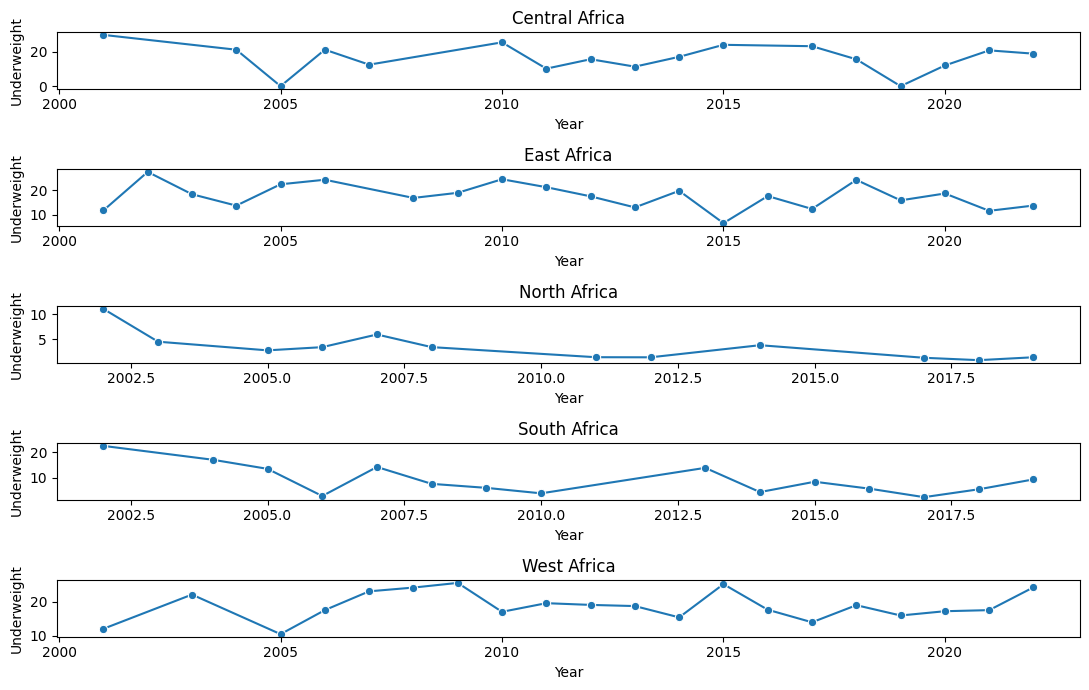

In [ ]:
# Underweight by region over years
ury = region_years_ind.groupby(['Region', 'Year'])['Underweight'].mean().reset_index()
ury

plt.figure(figsize=(11, 7))

# Get unique regions
reg = sry['Region'].unique()

# Create subplots
for i, region in enumerate(reg, start=1):
    plt.subplot(len(reg), 1, i)

    # Filter the DataFrame for the current region
    data_for_region = ury[ury['Region'] == region]

    # Plot the line for the current region
    sns.lineplot(data=data_for_region, x='Year', y='Underweight', marker = 'o', ci=None)

    plt.title(region)  # Set the title as the region name

# Adjust layout
plt.tight_layout()

plt.show()

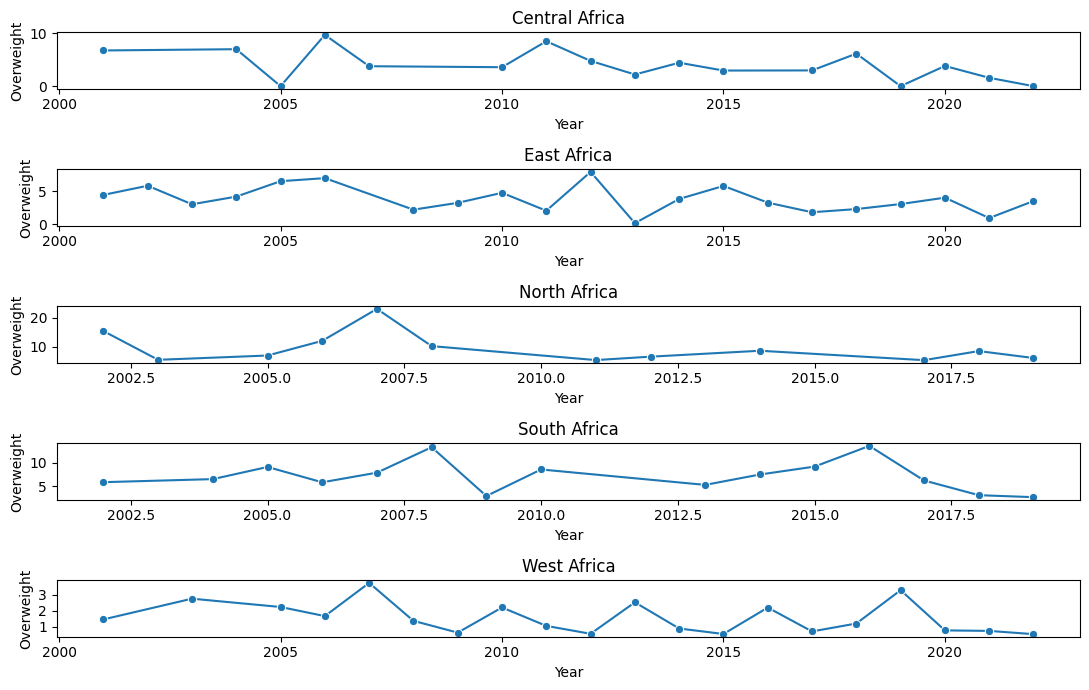

In [ ]:
ory = region_years_ind.groupby(['Region', 'Year'])['Overweight'].mean().reset_index()
plt.figure(figsize=(11, 7))

# Get unique regions
reg = ory['Region'].unique()

# Create subplots
for i, region in enumerate(reg, start=1):
    plt.subplot(len(reg), 1, i)

    # Filter the DataFrame for the current region
    data_for_region = ory[ory['Region'] == region]

    # Plot the line for the current region
    sns.lineplot(data=data_for_region, x='Year', y='Overweight', marker = 'o', ci=None)

    plt.title(region)  # Set the title as the region name

# Adjust layout
plt.tight_layout()

plt.show()

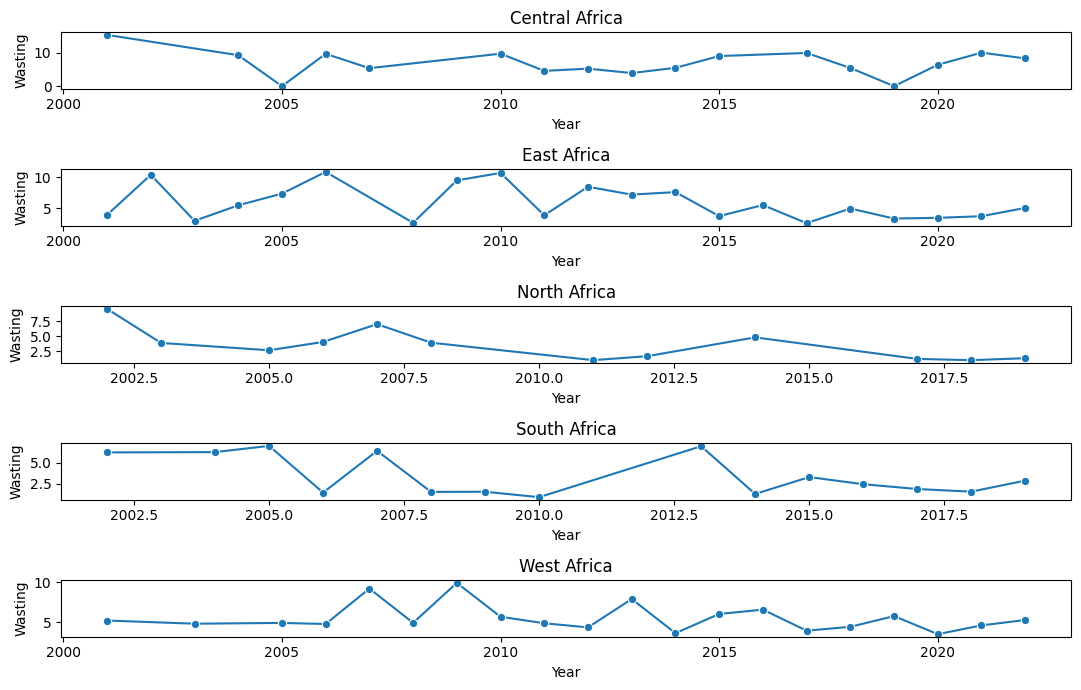

In [ ]:

Wasting_ry = region_years_ind.groupby(['Region', 'Year'])['Wasting'].mean().reset_index()

plt.figure(figsize=(11, 7))

# Get unique regions
reg = ory['Region'].unique()

# Create subplots
for i, region in enumerate(reg, start=1):
    plt.subplot(len(reg), 1, i)

    # Filter the DataFrame for the current region
    data_for_region = Wasting_ry[Wasting_ry['Region'] == region]

    # Plot the line for the current region
    sns.lineplot(data=data_for_region, x='Year', y='Wasting', marker = 'o', ci=None)

    plt.title(region)  # Set the title as the region name

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
poverty_ind
#sns.heatmap(poverty_ind, annot=True)

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Poverty_Rating,,,,,,,,,
Middle class,96.408919,33.132942,70.117665,-0.055730,42.445038,18.268814,7.651170,2.223638,4.734950
Poor,96.793155,39.155332,65.960967,-0.021288,38.783152,21.197813,8.376207,2.811062,5.230316
Rich,96.184449,25.562310,74.918852,0.113697,48.205435,12.066266,6.046812,1.880495,6.351795


In [ ]:
poverty_region_ind = nutri_africa.pivot_table(index=['Region', 'Poverty_Rating'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [ ]:
poverty_region_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
poverty_region_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
poverty_region_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
poverty_region_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
poverty_region_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [ ]:
poverty_region_ind

Indicator                      Breastfed   Stunting  Solid_Food   BMI_age  \
Region         Poverty_Rating                                               
Central Africa Middle class    96.158387  36.830212   76.965426 -0.019793   
               Poor            96.710968  43.020370   73.550000 -0.077215   
               Rich            95.778659  28.111628   78.812500  0.128824   
East Africa    Middle class    97.144527  39.856770   73.975000  0.008869   
               Poor            97.508392  47.022888   70.459677 -0.088385   
               Rich            97.071429  32.544258   77.145161  0.088642   
North Africa   Middle class    93.383708  17.512112   80.645545  0.570316   
               Poor            93.405128  20.225000   76.037500  0.544068   
               Rich            93.075309  14.932283   86.700000  0.638889   
South Africa   Middle class    94.424745  32.094825   87.090698  0.367186   
               Poor            95.422556  38.682081   84.794595  0.286286   
               Rich            93.292821  24.558403   92.400000  0.428151   
West Africa    Middle class    97.127987  30.356884   60.036130 -0.345109   
               Poor            97.259707  36.011653   54.650820 -0.265097   
               Rich            97.072350  21.450698   66.322222 -0.204773   

Indicator                      Meal_Frequency  Underweight   Wasting  \
Region         Poverty_Rating                                          
Central Africa Middle class         33.660741    20.850282  8.437903   
               Poor                 31.788889    25.448148  9.704321   
               Rich                 40.055556    14.143023  7.134884   
East Africa    Middle class         43.911198    20.994612  7.662229   
               Poor                 37.855263    26.586866  9.653474   
               Rich                 51.484211    15.348698  6.351302   
North Africa   Middle class         52.088889     5.105821  5.307173   
               Poor                 49.410000     5.375833  5.108333   
               Rich                 57.860000     3.823622  4.587402   
South Africa   Middle class         53.815743    11.661401  4.270059   
               Poor                 49.557692    14.825455  5.361212   
               Rich                 63.946154     8.059389  3.411354   
West Africa    Middle class         39.541964    20.011650  8.789936   
               Poor                 36.334783    22.461496  9.073407   
               Rich                 42.947826    12.893795  7.198337   

Indicator                      Severe_wasting  Overweight  
Region         Poverty_Rating                              
Central Africa Middle class          2.803159    5.244494  
               Poor                  3.518519    5.488889  
               Rich                  2.437791    6.744186  
East Africa    Middle class          2.396441    4.635260  
               Poor                  3.216918    4.355271  
               Rich                  1.940625    5.367488  
North Africa   Middle class          2.453015   14.034161  
               Poor                  2.243333   12.670000  
               Rich                  2.126772   14.660630  
South Africa   Middle class          1.457436    7.747665  
               Poor                  2.203636    6.689143  
               Rich                  1.155022    8.495798  
West Africa    Middle class          2.118612    2.132691  
               Poor                  2.587812    2.798347  
               Rich                  1.918290    3.429147